In [1]:
import kasatochi_example as ke
import datetime

Generally concentrations in HYSPLIT are calculated using a histogram method. The concentration grid defines a volume and the amount of mass in the volume is summed and divided by the volume to determine the concentration. If two HYSPLIT runs are performed with different random seeds, differences in the concentration in the same volume will usually be observed as the number of particles in the volume will be slightly different.

Here we show that the number of computational particles in a volume has a Poisson distribution; the concentrations calculated by the histogram method are subject to shot noise. 

Only one number is needed to specify the Poisson distribution as the variance is equal to the mean

## Volcanic Ash Simulation
We perform 50 HYSPLIT simulations with different random seeds. A volume is then chosen and the number of computational particles in that volume over some averaging time is counted for each of the 50 simulations. A normalized histogram (blue bars) of the number of particles found in the volume is plotted along with the Poisson distribution (in black) sharing the same mean.


The "S" runs were started from a PARDUMP file of the KB run on 9 Aug 2008 12z with a duration of 1 hour. The time step was set at 10 minutes and output was written at every time step to the PARDUMP file. The KB run released 50,000 particles per hour from a cylindrical source term at the vent and contained four particles sizes. Release began at August 8, 2008 at 04z and continued for 8 hours.

In [279]:
%autoreload
sntS = ke.ShotNoiseTest()
d1 = datetime.datetime(2008,8,9,12)
d2 = datetime.datetime(2008,8,9,13)
sntS.set_drange(d1,d2)
sntS.getdata('S')

Below are scatter plots of all the particle.

Time periods loaded
['2008-08-09T12:10:00.000000000' '2008-08-09T12:20:00.000000000'
 '2008-08-09T12:30:00.000000000' '2008-08-09T12:40:00.000000000'
 '2008-08-09T12:50:00.000000000' '2008-08-09T13:00:00.000000000']


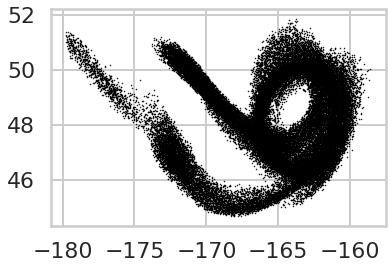

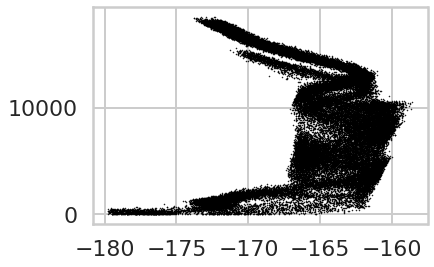

In [78]:
temp = sntS.phash['S1']
print('Time periods loaded')
print(temp.date.unique())
db = datetime.datetime(2008,8,9,12,10)
temp = temp[temp.date==db]
plt.plot(temp.lon, temp.lat, 'k.', MarkerSize=1)
plt.show()
plt.plot(temp.lon, temp.ht, 'k.', MarkerSize=1)

Below are distributions of the number of particles in various volumes.
lat and lon and ht describe the lower left corner of the volume. dlat describes the horizontal widths, dht describes the vertical extent in meters.

There are four particles sizes simulated.
If poll is specified then only that particle size is used in the distribution.
If stime=None then particles at all times are counted. If stime is specified then only particles at stime are counted.


In [326]:
import seaborn as sns
from matplotlib import ticker
def partplot(sntS,lat,lon,ht,dlat,dht,poll,stime,sz=5,name='junk'):
    keys = list(sntS.phash.keys())
    d1 = sntS.phash[keys[1]]
    d2 = sntS.phash[keys[40]]
    d3 = sntS.phash[keys[15]]
    sns.set(font_scale=1)
    sns.set_style('white')
    df1 = sntS.get_parnumdf(d1,lat,lon,ht,dlat,dht,poll,stime)
    plt.plot(df1.lon,df1.lat,'k.',MarkerSize=sz)
    df2 = sntS.get_parnumdf(d2,lat,lon,ht,dlat,dht,poll,stime)
    plt.plot(df2.lon,df2.lat,'r.',MarkerSize=sz)
    df3 = sntS.get_parnumdf(d3,lat,lon,ht,dlat,dht,poll,stime)
    plt.plot(df3.lon,df3.lat,'b.',MarkerSize=sz)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x)))
    plt.xlabel('longitude')
    plt.ylabel('latitude') 
    plt.tight_layout()
    plt.savefig('{}{}.{}'.format(name,'latlon','png'))
    plt.show()
    sns.set(font_scale=1)
    sns.set_style('white')
    plt.plot(df1.lon,df1.ht/1000.0,'k.',MarkerSize=sz)
    plt.plot(df2.lon,df2.ht/1000.0,'r.',MarkerSize=sz)
    plt.plot(df3.lon,df3.ht/1000.0,'b.',MarkerSize=sz)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x)))
    plt.xlabel('longitude')
    plt.ylabel('height (km)')
    plt.tight_layout()
    plt.savefig('{}{}.{}'.format(name,'htlon','png'))
    plt.show()

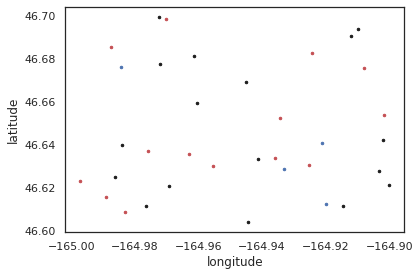

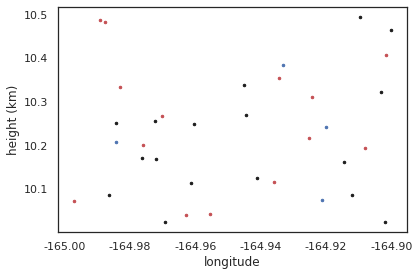

Mean 13.06
Min, Max 4 23
4.0 23 12


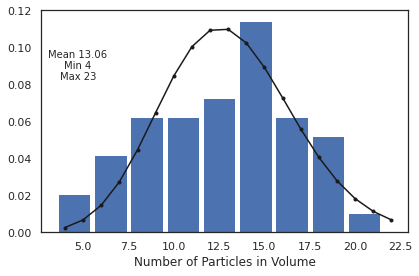

In [324]:

#%load_ext autoreload
%autoreload
#Pick a volume
lat = 46.6
lon = -165
ht =10000
dlat = 0.1
dht = 500  #m
poll = None
stime = None
partplot(sntS,lat,lon,ht,dlat,dht,poll,stime)

numdist = sntS.get_num_dist(lat,lon,ht,dlat,dht,poll,stime)
sntS.compare_numdist(numdist,bwidth=2)

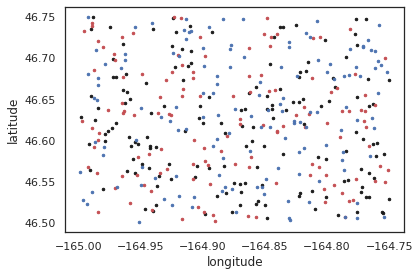

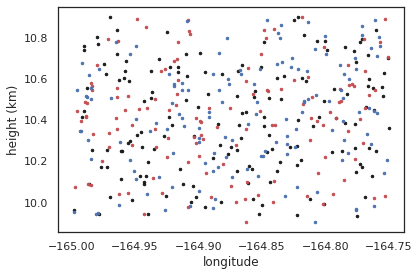

Mean 138.34
Min, Max 110 171
103.0 172 133


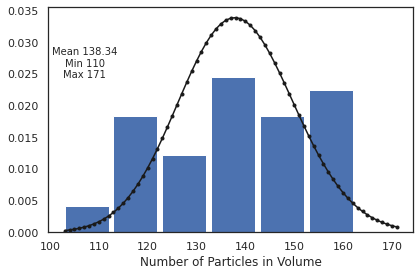

In [304]:

#%load_ext autoreload
%autoreload
#Pick a volume
lat = 46.5
lon = -165
ht =9900
dlat = 0.25
dht = 1000  #m
poll = None
stime = None
partplot(sntS,lat,lon,ht,dlat,dht,poll,stime)

numdist = sntS.get_num_dist(lat,lon,ht,dlat,dht,poll,stime)
sntS.compare_numdist(numdist,bwidth=10)

Change the height of the volume. There are less particles at 8km.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


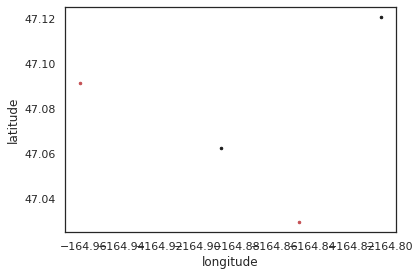

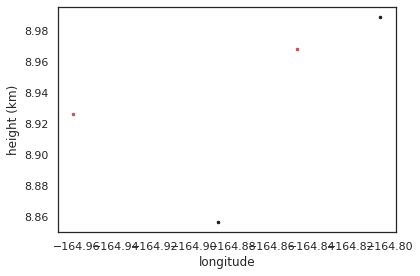

Mean 1.44
Min, Max 0 5
0.0 5 1


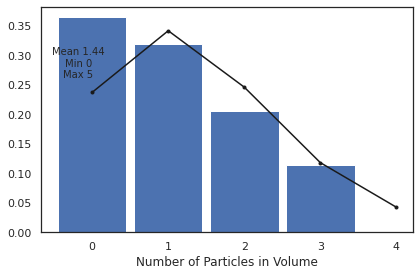

In [305]:
%load_ext autoreload
%autoreload
#Pick a volume
lat = 47
lon = -165
ht =8000
dlat = 0.25
dht = 1000  #m
poll = None
stime = None
partplot(sntS,lat,lon,ht,dlat,dht,poll,stime)
numdist = sntS.get_num_dist(lat,lon,ht,dlat,dht,poll,stime)
sntS.compare_numdist(numdist,bwidth=1)

There are even more particles at 14km.

# %autoreload
#Pick a volume
lat = 47
lon = -165
ht =14000 25
dlat = 0.25
dht =1000  #m
poll = None
stime = None
partplot(sntS,lat,lon,ht,dlat,dht,poll,stime,name='shotnoise1')
numdist = sntS.get_num_dist(lat,lon,ht,dlat,dht,poll,stime)
sntS.compare_numdist(numdist,bwidth=15,name='shotnoise1')

Look at only one time period.

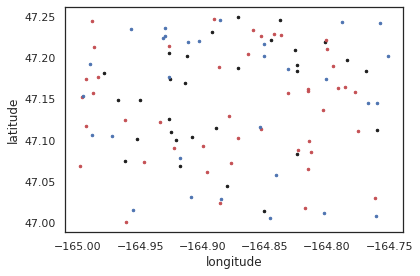

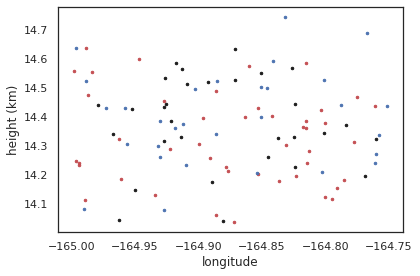

Mean 34.0
Min, Max 20 46
20.0 46 32


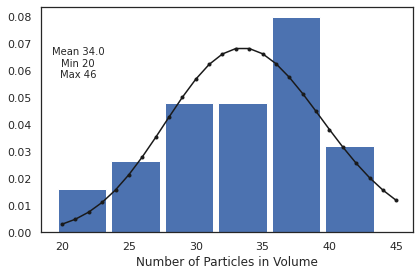

In [311]:
%autoreload
#Pick a volume
lat = 47
lon = -165
ht =14000
dlat = 0.25
dht = 1000  #m
poll = None
name='shotnoise2'
stime = datetime.datetime(2008,8,9,12,10)
partplot(sntS,lat,lon,ht,dlat,dht,poll,stime,name=name)
numdist = sntS.get_num_dist(lat,lon,ht,dlat,dht,poll,stime)
sntS.compare_numdist(numdist,bwidth=4,name=name)

Now move the volume to a different latitutde and longitude and look at a smaller volume.

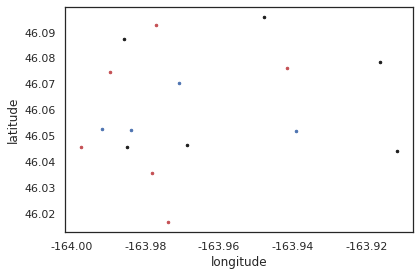

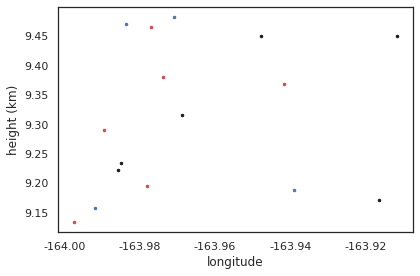

Mean 8.72
Min, Max 0 16
0.0 16 8


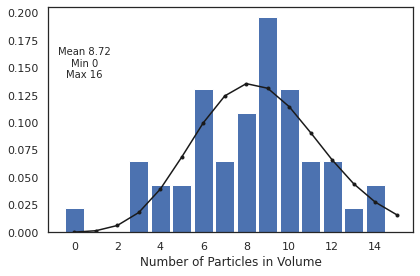

In [327]:
%autoreload
#Pick a volume
lat = 46
lon = -164
ht =9000
dlat = 0.1
dht = 500  #m
poll = None

stime = None
partplot(sntS,lat,lon,ht,dlat,dht,poll,stime)
numdist = sntS.get_num_dist(lat,lon,ht,dlat,dht,poll,stime)
sntS.compare_numdist(numdist,bwidth=1)

Look at a single species.

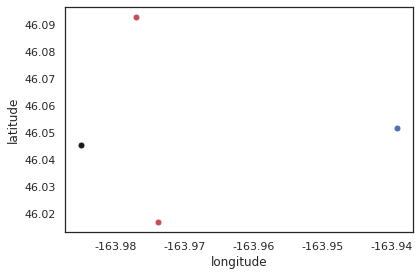

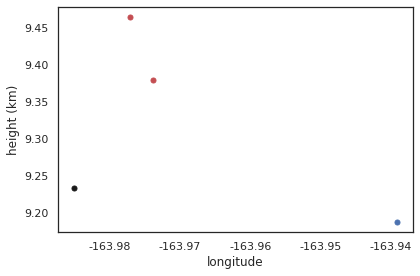

Mean 2.84
Min, Max 0 9
0.0 9 2


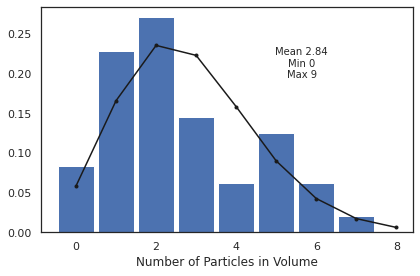

In [329]:
%autoreload
#Pick a volume
lat = 46
lon = -164
ht =9000
dlat = 0.1
dht = 500  #m
poll = 2
stime = None
name='shotnoise3'
partplot(sntS,lat,lon,ht,dlat,dht,poll,stime,sz=10,name=name)
numdist = sntS.get_num_dist(lat,lon,ht,dlat,dht,poll,stime)
sntS.compare_numdist(numdist,bwidth=1,name=name)

## Captex 2.
This time try running 100 simulations with different SEEDS.
Look at first three hours of Captex2 run.

In [ ]:
%autoreload
sntcap = ke.ShotNoiseTest()
sntcap.tdir = '/n-data/alicec/captex/captexNew/shotnoise/'
d1 = datetime.datetime(1983,9,25,18)
d2 = datetime.datetime(1983,9,25,21,55)
sntcap.set_drange(d1,d2)
print(sntcap.stime)
print(sntcap.etime)



In [223]:
%autoreload
sntcap.getdata('C')

In [243]:
%autoreload
sntcap.getdata('C',nrange=[51,101])

In [244]:
sntcap.phash.keys()

dict_keys(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'C87', 'C88', 'C89', 'C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'C98', 'C99', 'C100'])

Time periods loaded
['1983-09-25T18:00:00.000000000' '1983-09-25T18:05:00.000000000'
 '1983-09-25T18:10:00.000000000' '1983-09-25T18:15:00.000000000'
 '1983-09-25T18:20:00.000000000' '1983-09-25T18:25:00.000000000'
 '1983-09-25T18:30:00.000000000' '1983-09-25T18:35:00.000000000'
 '1983-09-25T18:40:00.000000000' '1983-09-25T18:45:00.000000000'
 '1983-09-25T18:50:00.000000000' '1983-09-25T18:55:00.000000000'
 '1983-09-25T19:00:00.000000000' '1983-09-25T19:05:00.000000000'
 '1983-09-25T19:10:00.000000000' '1983-09-25T19:15:00.000000000'
 '1983-09-25T19:20:00.000000000' '1983-09-25T19:25:00.000000000'
 '1983-09-25T19:30:00.000000000' '1983-09-25T19:35:00.000000000'
 '1983-09-25T19:40:00.000000000' '1983-09-25T19:45:00.000000000'
 '1983-09-25T19:50:00.000000000' '1983-09-25T19:55:00.000000000'
 '1983-09-25T20:00:00.000000000' '1983-09-25T20:05:00.000000000'
 '1983-09-25T20:10:00.000000000' '1983-09-25T20:15:00.000000000'
 '1983-09-25T20:20:00.000000000' '1983-09-25T20:25:00.000000000'
 '198

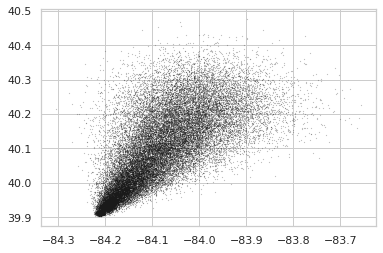

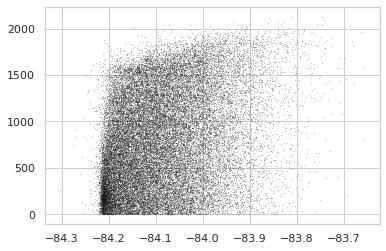

In [258]:
temp = sntcap.phash['C1']
print('Time periods loaded')
print(temp.date.unique())
db = d1 + datetime.timedelta(hours=1)
temp = temp[temp.date==db]
plt.plot(temp.lon, temp.lat, 'k.', MarkerSize=0.2)
plt.show()
plt.plot(temp.lon, temp.ht, 'k.', MarkerSize=0.2)

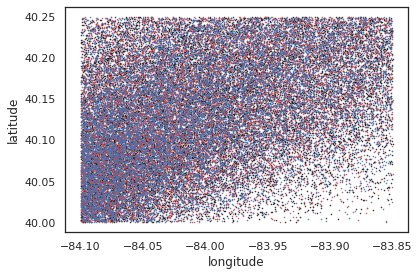

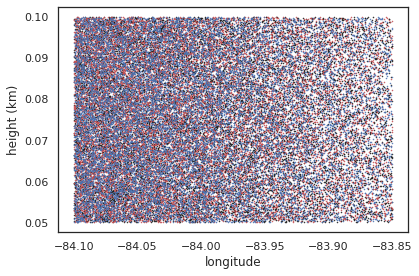

[14930, 14529, 14442, 14482, 14564, 14290, 14718, 14537, 14472, 14581, 14336, 14795, 14628, 14667, 14324, 14746, 14295, 14672, 14563, 14477, 14365, 14753, 14506, 14685, 14431, 14487, 14560, 14504, 14615, 14426, 14924, 14456, 14697, 14483, 14628, 14375, 14391, 14792, 14818, 14612, 14572, 14431, 14571, 14391, 14593, 14606, 14325, 14732, 14747, 14558, 14517, 14456, 14625, 14439, 14439, 14579, 14298, 14253, 14493, 14278, 14690, 14798, 14244, 14363, 14545, 14489, 14430, 14393, 14383, 14758, 14841, 14590, 14613, 14575, 14525, 14279, 14682, 14761, 14655, 14674, 14336, 14730, 14669, 14473, 14530, 14758, 14908, 14524, 14706, 14567, 14608, 14786, 14592, 14452, 14525, 14414, 14751, 14483, 14371, 14591]
Mean 14555.21
Min, Max 14244 14930
14205.0 15079 14505


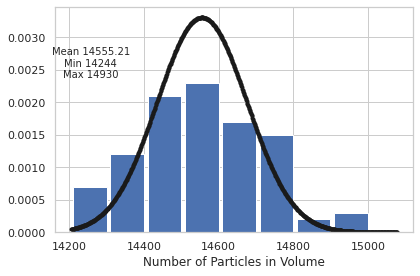

In [257]:
#This is the three hour average
# Distribution actually looks a little flatter than the Poisson.
%autoreload
#Pick a volume
lat = 40
lon = -84.1
ht =50
dlat = 0.25
dht = 50  #m
poll = None
#stime = db
stime=None
partplot(sntcap,lat,lon,ht,dlat,dht,poll,stime,sz=1)
numdist = sntcap.get_num_dist(lat,lon,ht,dlat,dht,poll,stime)
print(numdist)
sntcap.compare_numdist(numdist,bwidth=100)

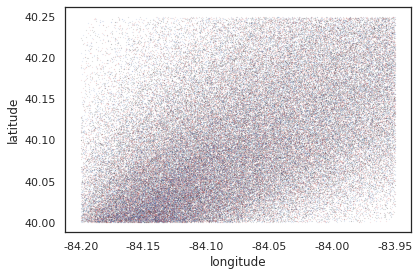

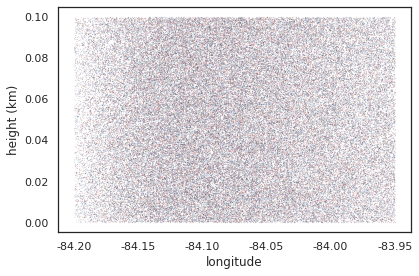

[35416, 35392, 35514, 34984, 35122, 34905, 35519, 35463, 35117, 35061, 34794, 35658, 35626, 35498, 35090, 35743, 35166, 35449, 35025, 35404, 35352, 35717, 35337, 35599, 35280, 35101, 35194, 35431, 35342, 35028, 35464, 35327, 35671, 35603, 35063, 34918, 35294, 35833, 35386, 35394, 35475, 34996, 35143, 35104, 35386, 35287, 34875, 35976, 35588, 35717, 35622, 35089, 35622, 34955, 35101, 35420, 34781, 34955, 34813, 35214, 35587, 35319, 34343, 34893, 35344, 34820, 35435, 35306, 35203, 35638, 35738, 34947, 35647, 35331, 35081, 34750, 35252, 35949, 35046, 35393, 35265, 35257, 35161, 35194, 35540, 35277, 35672, 35489, 35282, 35285, 34852, 35318, 35365, 34900, 35580, 35285, 35159, 35460, 34914, 35290]
Mean 35289.66
Min, Max 34343 35976
34189.0 36335 35189


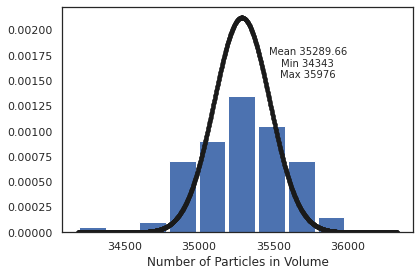

In [330]:
%autoreload
#Pick a volume
lat = 40
lon = -84.2
ht =0
dlat = 0.25
dht = 100  #m
poll = None
stime = None
#captex2. 3 hour average with deltaT=5 minutes. from 18z to 21z
name = 'shotnoise4'
partplot(sntcap,lat,lon,ht,dlat,dht,poll,stime,sz=0.1,name=name)
numdist = sntcap.get_num_dist(lat,lon,ht,dlat,dht,poll,stime)
print(numdist)
sntcap.compare_numdist(numdist,bwidth=200,name=name)

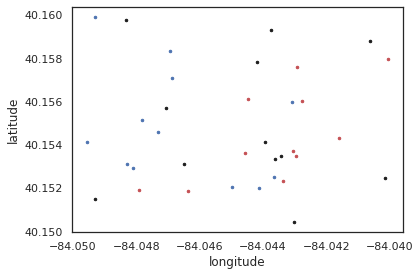

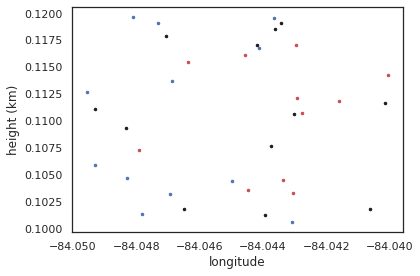

[12, 12, 21, 11, 14, 12, 21, 13, 25, 10, 14, 10, 14, 13, 13, 12, 16, 11, 14, 14, 17, 14, 13, 14, 15, 18, 16, 18, 14, 19, 13, 16, 18, 19, 20, 12, 16, 23, 13, 19, 11, 8, 16, 14, 16, 15, 15, 13, 21, 21, 10, 9, 13, 14, 15, 10, 9, 14, 13, 15, 11, 18, 13, 11, 13, 16, 15, 12, 14, 11, 14, 12, 5, 12, 14, 15, 13, 14, 12, 17, 7, 17, 7, 15, 9, 15, 19, 12, 12, 17, 15, 13, 12, 15, 19, 12, 15, 15, 10, 23]
Mean 14.22
Min, Max 5 25
5.0 25 13


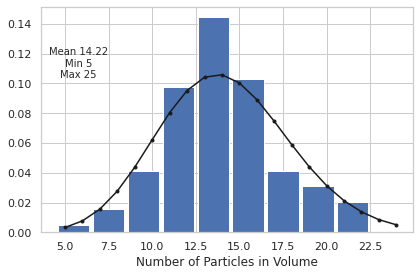

In [262]:
%autoreload
#Pick a volume
lat = 40.15
lon = -84.05
ht =100
dlat = 0.01
dht = 20  #m
poll = None
stime = None
partplot(sntcap,lat,lon,ht,dlat,dht,poll,stime,sz=5)
numdist = sntcap.get_num_dist(lat,lon,ht,dlat,dht,poll,stime)
print(numdist)
sntcap.compare_numdist(numdist,bwidth=2)

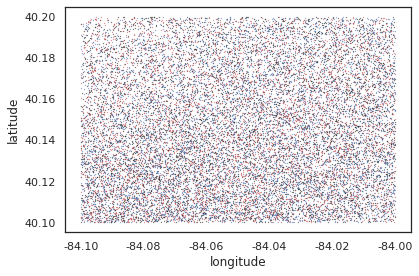

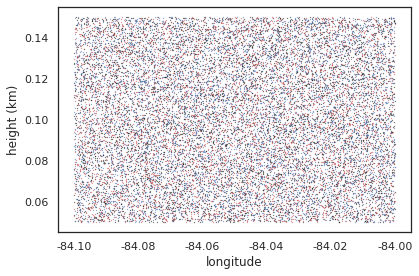

[6746, 6530, 6484, 6658, 6765, 6579, 6598, 6644, 6833, 6794, 6499, 6755, 6632, 6632, 6613, 6706, 6586, 6934, 6684, 6914, 6629, 6867, 6685, 6741, 6603, 6627, 6904, 6780, 6722, 6491, 6774, 6591, 6836, 6695, 6747, 6607, 6871, 6831, 6566, 6725, 6642, 6679, 6714, 6611, 6651, 6750, 6606, 6775, 6750, 6673, 6691, 6651, 6724, 6595, 6708, 6766, 6534, 6523, 6640, 6596, 6548, 6966, 6507, 6518, 6566, 6642, 6835, 6582, 6790, 6760, 6827, 6738, 6758, 6715, 6575, 6761, 6585, 6737, 6486, 6633, 6677, 6541, 6517, 6561, 6547, 6715, 7040, 6606, 6699, 6576, 6699, 6560, 6695, 6514, 6873, 6504, 6716, 6735, 6551, 6684]
Mean 6676.96
Min, Max 6484 7040
6451.0 7110 6651


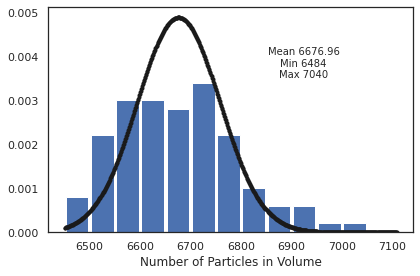

In [331]:
%autoreload
#Pick a volume
lat = 40.1
lon = -84.1
ht =50
dlat = 0.1
dht = 100  #m
poll = None
stime = None
name='shotnoise5'
partplot(sntcap,lat,lon,ht,dlat,dht,poll,stime,sz=0.5,name=name)
numdist = sntcap.get_num_dist(lat,lon,ht,dlat,dht,poll,stime)
print(numdist)
sntcap.compare_numdist(numdist,bwidth=50,name=name)

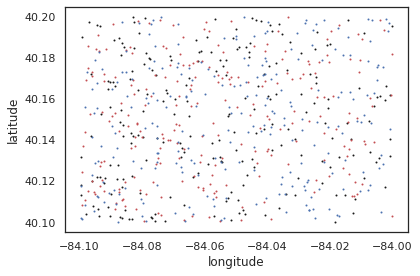

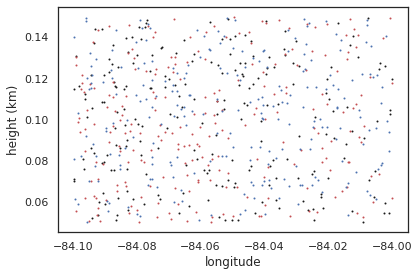

[267, 219, 241, 243, 225, 239, 220, 243, 239, 211, 241, 243, 259, 233, 243, 241, 256, 257, 259, 231, 230, 237, 238, 237, 248, 233, 255, 239, 230, 215, 248, 244, 249, 230, 244, 238, 275, 235, 226, 220, 233, 232, 245, 236, 241, 245, 229, 251, 264, 277, 251, 234, 252, 229, 240, 227, 237, 238, 229, 229, 254, 235, 213, 257, 250, 230, 240, 248, 260, 239, 255, 237, 227, 242, 252, 217, 246, 224, 259, 255, 228, 226, 242, 225, 207, 246, 246, 204, 250, 265, 240, 240, 258, 246, 259, 223, 222, 289, 234, 255]
Mean 240.45
Min, Max 204 289
195.0 291 235


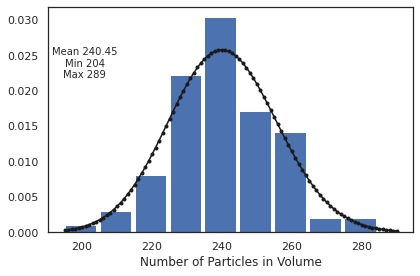

In [298]:
%autoreload
# This is just one time period
#Pick a volume
lat = 40.1
lon = -84.1
ht =50
dlat = 0.1
dht = 100  #m
poll = None
stime = db
partplot(sntcap,lat,lon,ht,dlat,dht,poll,stime,sz=2)
numdist = sntcap.get_num_dist(lat,lon,ht,dlat,dht,poll,stime)
print(numdist)
sntcap.compare_numdist(numdist,bwidth=10)

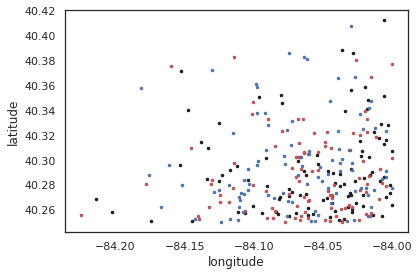

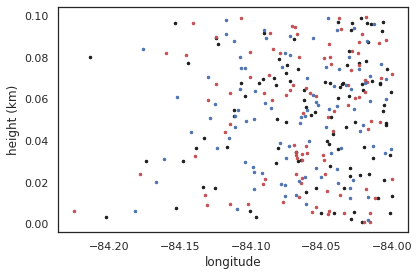

[112, 101, 105, 113, 105, 118, 96, 95, 101, 106, 113, 107, 102, 109, 115, 96, 104, 102, 105, 104, 129, 111, 115, 111, 105, 108, 96, 96, 95, 111, 89, 113, 106, 120, 97, 116, 103, 97, 109, 101, 97, 98, 100, 121, 110, 98, 100, 114, 102, 91, 98, 102, 101, 83, 106, 89, 100, 106, 117, 111, 83, 123, 84, 118, 97, 101, 118, 92, 106, 112, 104, 107, 109, 112, 114, 100, 86, 109, 99, 84, 85, 103, 102, 91, 97, 107, 97, 106, 79, 102, 99, 101, 109, 117, 89, 105, 99, 100, 115, 98]
Mean 103.4
Min, Max 79 129
76.0 130 101


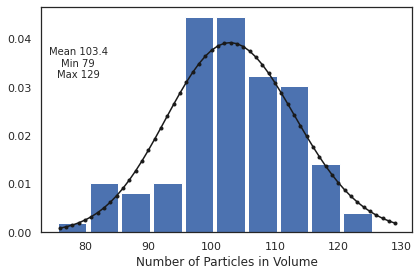

In [297]:
%autoreload
#Pick a volume
lat = 40.25
lon = -84.25
ht =0
dlat = 0.25
dht = 100  #m
poll = None
stime = db
partplot(sntcap,lat,lon,ht,dlat,dht,poll,stime)
numdist = sntcap.get_num_dist(lat,lon,ht,dlat,dht,poll,stime)
print(numdist)
sntcap.compare_numdist(numdist,bwidth=5)

In [289]:
import numpy as np
np.sqrt(1000*1)

31.622776601683793

In [291]:
111/4.0 

27.75

In [292]:
np.sqrt(0.1*2)

0.4472135954999579

In [295]:
np.sqrt(0.1*0.2)

0.14142135623730953

In [296]:
np.sqrt(0.1*5*0.2)

0.31622776601683794